#### Exercise 1 - Bank dataset

##### Important libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml

##### Loading the data

In [2]:
#directly downloading from openml
dataset = openml.datasets.get_dataset(1461)
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute)

In [3]:
df_bank = pd.DataFrame(X, columns=attribute_names)
df_bank["class"] = y
df_bank.head(5)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,class
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


In [4]:
# rename columns
column_names_bank = ['age', 'job', 'marital', 'education', 'default',
                     'balance', 'housing', 'loan', 'contact', 'day',
                     'month', 'duration', 'campaign', 'pdays',
                     'previous', 'poutcome', 'class']
df_bank.columns = column_names_bank

#### Data processing

In [5]:
# Number of samples and number of attributes
num_samples = df_bank.shape[0]
num_attributes = df_bank.shape[1] - 1 # last one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  45211
The number of attributes is:  16


In [6]:
# print number unknown values:
num_missing = 0
for n in column_names_bank:
  num_missing_per_feature = df_bank.loc[:,n].isin(['unknown']).sum(axis=0)
  num_missing += num_missing_per_feature
  print(n, ':', num_missing_per_feature)
print('total missing:', num_missing)

#for the moment, I decided to keep these missing values as they are

age : 0
job : 288
marital : 0
education : 1857
default : 0
balance : 0
housing : 0
loan : 0
contact : 13020
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 36959
class : 0
total missing: 52124


In [7]:
print(df_bank.dtypes)

age             uint8
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day             uint8
month        category
duration      float64
campaign        uint8
pdays         float64
previous      float64
poutcome     category
class        category
dtype: object


In [8]:
#print out null values

df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
class        0
dtype: int64

In [9]:
#Counting the number of samples for each class
bank = df_bank.to_numpy()
bank_num_class_1 = sum(bank[:, -1] == '1')
bank_num_class_2 = sum(bank[:, -1] == '2')

print("Number of samples that belong to class 1: ", str(bank_num_class_1))
print("Number of samples that belong to class 2: ", str(bank_num_class_2))

Number of samples that belong to class 1:  39922
Number of samples that belong to class 2:  5289


As seen above, our dataset is highly imbalanced with the majority class being class 1 (clients who have subscribed to a term deposit) and minority class class 2 (clients who have not subscribed to a term deposit). Imbalanced dataset are very common in classification tasks and this issue may affect our overall prediction accuracy.

Looking into our data columns:

`Class Column`

In [10]:
df_bank['class'] = df_bank['class'].map({'1': 1, '2': 0})


In [11]:
df_bank['class'] = df_bank['class'].astype('int64')

`Job Column`

In [12]:
df_bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
#investigating job vs term deposit (y)
df_bank[df_bank['class']==1][['job','class']].groupby(['job','class']).size()

job            class
admin.         1        4540
blue-collar    1        9024
entrepreneur   1        1364
housemaid      1        1131
management     1        8157
retired        1        1748
self-employed  1        1392
services       1        3785
student        1         669
technician     1        6757
unemployed     1        1101
unknown        1         254
dtype: int64

In [14]:
#some jobs look like can be combined together into same category
df_bank['job'] = df_bank['job'].replace(['services','housemaid'], 'pink-collar')
df_bank['job'] = df_bank['job'].replace(['admin','management'], 'blue-collar')
df_bank['job'] = df_bank['job'].replace(['student','unemployed','retired'], 'other')


In [15]:
#new value count
df_bank.job.value_counts()

blue-collar      19190
technician        7597
pink-collar       5394
admin.            5171
other             4505
self-employed     1579
entrepreneur      1487
unknown            288
Name: job, dtype: int64

`Contact`

In [16]:
#dropping this column since it does not bring much value to our analysis
df_bank.drop('contact', axis=1, inplace=True)

`Default, Housing, Loan`

In [17]:
print(df_bank.default.unique())
print(df_bank.housing.unique())
print(df_bank.loan.unique())

['no', 'yes']
Categories (2, object): ['no' < 'yes']
['yes', 'no']
Categories (2, object): ['no' < 'yes']
['no', 'yes']
Categories (2, object): ['no' < 'yes']


In [18]:
#converting their values to integers 1 and 0
df_bank['default'] = df_bank['default'].map({'yes': 1, 'no': 0})
df_bank.default = df_bank['default'].astype('int64')

df_bank['housing'] = df_bank['housing'].map({'yes': 1, 'no': 0})
df_bank.housing = df_bank['housing'].astype('int64')

df_bank['loan'] = df_bank['loan'].map({'yes': 1, 'no': 0})
df_bank.loan = df_bank['loan'].astype('int64')

`Month & Day`

In [19]:
#dropping these columns since they do not bring much value to our analysis
df_bank.drop('month', axis=1, inplace=True)
df_bank.drop('day', axis=1, inplace=True)

`Pdays`

In [20]:
#this column gives information about the last time the clients were contacted
#value of -1 indicates that the client was not contacted at all
print('Number of clients not contacted:',df_bank[df_bank['pdays']==-1].shape[0])
print('Number of clients  contacted:',df_bank[df_bank['pdays']!=-1].shape[0])

Number of clients not contacted: 36954
Number of clients  contacted: 8257


#### I think this is a good idea but i dont know whether it makes much sense since we standardize values?

In [21]:
#we are going to replace of the value of -1 with a bigger value(indicates that this is so far in the past and it should not have an effect anymore)

df_bank.loc[df_bank['pdays'] == -1, 'pdays'] = 100000

Standardization of numerical columns

In [22]:
numeric_columns = ['age','balance','duration','pdays','previous']

In [23]:
for col in numeric_columns:
    print("Value range for the attribute",df_bank.columns.get_loc(col)+1,'('+col+')', " : ",df_bank[col].min(), " - ", df_bank[col].max())


Value range for the attribute 1 (age)  :  18  -  95
Value range for the attribute 6 (balance)  :  -8019.0  -  102127.0
Value range for the attribute 9 (duration)  :  0.0  -  4918.0
Value range for the attribute 11 (pdays)  :  1.0  -  100000.0
Value range for the attribute 12 (previous)  :  0.0  -  275.0


In [24]:
# Attributes have significantly different value ranges -> normalisation/standardisation should be done
# as part of pre-processing
# Z score standardisation: z_i = (x_i - m)/sigma
# #Saving the values directly in the dataframe- for visualization purposes

for col in numeric_columns:
    df_bank[col] = (df_bank[col] - df_bank[col].mean())/df_bank[col].std()

In [25]:
for col in numeric_columns:
    print("Value range for the attribute",df_bank.columns.get_loc(col)+1,'('+col+')', " : ",df_bank[col].min(), " - ", df_bank[col].max())


Value range for the attribute 1 (age)  :  -2.1599702607349784  -  5.091345825158488
Value range for the attribute 6 (balance)  :  -3.081114471206138  -  33.094409749676
Value range for the attribute 9 (duration)  :  -1.0024667918804944  -  18.094499693960735
Value range for the attribute 11 (pdays)  :  -2.121306458745294  -  0.47268874001400024
Value range for the attribute 12 (previous)  :  -0.25193758438383757  -  119.13466473615058


Converting the rest of categorical attributes to dummy variables

In [26]:
df_bank_dummies = pd.get_dummies(df_bank, columns=['job','marital','education','poutcome'],
 prefix = ['job','marital','education','poutcome'])

In [27]:
df_bank_dummies.describe()


,age,default,balance,housing,loan,duration,campaign,pdays,previous,class,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4.521100e+04,45211.000000,4.521100e+04,45211.000000,45211.000000,4.521100e+04,45211.000000,4.521100e+04,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.011667e-16,0.018027,1.760208e-17,0.555838,0.160226,5.909271e-17,2.763841,-1.609333e-16,0.000000,0.883015,...,0.601933,0.282896,0.151534,0.513194,0.294198,0.041074,0.108403,0.040698,0.033421,0.817478
std,1.000000e+00,0.133049,1.000000e+00,0.496878,0.366820,1.000000e+00,3.098021,1.000000e+00,1.000000,0.321406,...,0.489505,0.450411,0.358572,0.499831,0.455687,0.198464,0.310892,0.197592,0.179735,0.386278
min,-2.159970e+00,0.000000,-3.081114e+00,0.000000,0.000000,-1.002467e+00,1.000000,-2.121306e+00,-0.251938,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.473762e-01,0.000000,-4.237673e-01,0.000000,0.000000,-6.025100e-01,1.000000,4.726887e-01,-0.251938,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.823386e-01,0.000000,-3.002766e-01,1.000000,0.000000,-3.035132e-01,2.000000,4.726887e-01,-0.251938,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.652178e-01,0.000000,2.158719e-02,1.000000,0.000000,2.362344e-01,3.000000,4.726887e-01,-0.251938,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.091346e+00,1.000000,3.309441e+01,1.000000,1.000000,1.809450e+01,63.000000,4.726887e-01,119.134665,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#As seen below all variables are integers/float 
df_bank_dummies.dtypes

age                    float64
default                  int64
balance                float64
housing                  int64
loan                     int64
duration               float64
campaign                 uint8
pdays                  float64
previous               float64
class                    int64
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_self-employed        uint8
job_pink-collar          uint8
job_other                uint8
job_technician           uint8
job_unknown              uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
poutcome_failure         uint8
poutcome_other           uint8
poutcome_success         uint8
poutcome_unknown         uint8
dtype: object

#### Correlation Matrix

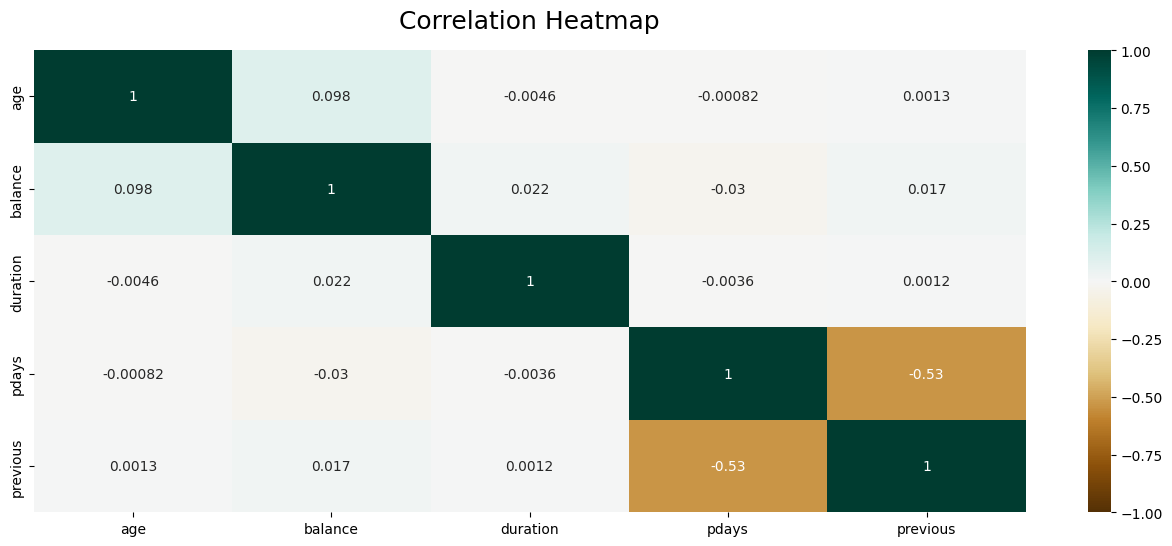

In [33]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_bank_dummies[numeric_columns].corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
# plt.savefig('bank_heatmap.jpg',)
plt.show()